In [2]:
import Inflow
from ResearchProjects import adaptation
from ResearchProjects.adaptation.pipelines import pipelines
import pandas as pd, one

In [ ]:
def import_module_level(name, globals=None, locals=None, fromlist=(), level=0):

    if level > 0:
        assert globals is not None, "globals argument is required for relative imports"
        package_name = globals.get('__package__')
        module = import_module_relative(name, package_name, level)
        if fromlist:
            return getattr(module, fromlist[0])
        return module
    else:
        return import_module(name)

def import_module_relative(name, package=None, level=0):
    if level > 0:
        package_parts = package.split('.')
        trunc_package = '.'.join(package_parts[:-level])
        name = '.'.join([''] * level + [name])
        return import_module(name, trunc_package)
    else:
        return import_module(name, package)

In [1]:
class DittoObject:
    def __getitem__(self, name):
        print(f"askitem {name}")
        return self

    def __getattr__(self, name):
        print(f"askattr {name}")
        return self

    def __call__(self,*args,**kwargs):
        print("askcall")
        return self

class ContextImporter:
    def __init__(self, callable):
        self.original_import = __builtins__.__import__
        self.callable = callable
        __builtins__.__import__ = self.callable
        
    def __enter__(self):
        return self.callable

    def __exit__(self, exc_type, exc_val, exc_tb):
        __builtins__.__import__ = self.original_import

max_cycles = 0

def temporary_skip_imports(name, fromlist = ()):
    _import = __builtins__.__import__
    
    def filtering_import_func(_name, *args, cycles = 0, **kwargs):
        global max_cycles
        if _name != name :
            try :
                return _import(_name, *args, **kwargs)
            except ModuleNotFoundError as e :
                cycles += 1
                print(f"Catched not importable {cycles} time due to : {e} for {_name},{kwargs}")
                max_cycles = max(max_cycles,cycles)
                return filtering_import_func(_name, *args, cycles= cycles, **kwargs)                
                
        print(f"filter bypass import : {_name},{kwargs}")
        return _import(_name, *args, **kwargs)

    with ContextImporter(filtering_import_func) as filter_import:
        my_module = filter_import(name, fromlist=fromlist)

    return my_module


#print(f"rerouted import : {_name},{kwargs} ")
                #return DittoObject()

In [3]:
data = temporary_skip_imports("ResearchProjects.adaptation.pipelines")

filter bypass import : ResearchProjects.adaptation.pipelines,{'fromlist': ()}


In [3]:
import numpy.random

In [ ]:
data = temporary_skip_imports("numpy.random")

filter bypass import : numpy.random,{'fromlist': ()}
Catched not importable 1 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 2 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 3 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 4 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 5 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 6 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 7 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 8 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 9 time due to : No module named 'numpy._version_meson' for _version_meson,{}
Catched not importable 10 time due to : No modu

<Axes: title={'center': 'Pipeline preproc_data requirement graph'}>

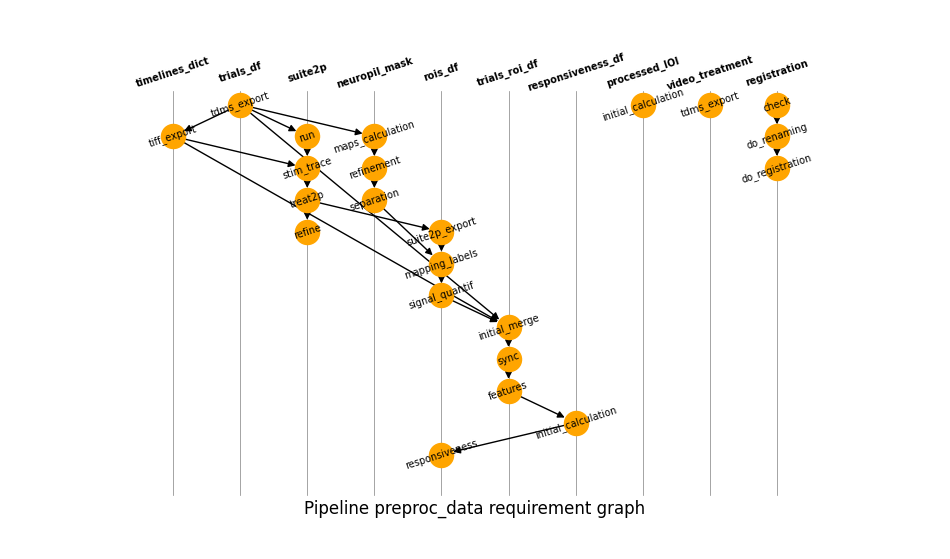

In [3]:
new_pipelines.graph.draw()

In [3]:
connector = one.ONE(data_access_mode = "remote")
session = connector.search(id = r"wm30\2023-09-19\001", details = True, no_cache = True).iloc[0]
session

Loading session details: 100%|███████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.38s/it]


subject                                                                      wm30
users                                                                [wilsonmena]
location                                                 Fernbach - 2p stim setup
procedures                                                   [Two photon Imaging]
lab                                                                      HaissLab
projects                                                             [Adaptation]
type                                                                         None
task_protocol                                                                    
number                                                                          1
start_time                                                    2023-09-19T10:45:30
end_time                                                                     None
narrative                       - Vgat#27 / wm#30_20230919\r\n- Folder/Session...
parent_session  

In [ ]:
resp_datas = new_pipelines.responsiveness_df.initial_calculation.generate(session, refresh = True)

In [7]:
resp_datas.columns

Index(['in_target_barrel', 'nontarget_amplitude', 'target_whisker', 'method',
       'fit_time', 'score_time', 'test_true_neg', 'test_false_pos',
       'test_false_neg', 'test_true_pos', 'test_score_acc',
       'test_score_acc_balanced', 'test_score_f1', 'shuffled_fit_time',
       'shuffled_score_time', 'shuffled_test_true_neg',
       'shuffled_test_false_pos', 'shuffled_test_false_neg',
       'shuffled_test_true_pos', 'shuffled_test_score_acc',
       'shuffled_test_score_acc_balanced', 'shuffled_test_score_f1',
       'average_score_acc', 'average_score_acc_balanced', 'average_score_f1',
       'shuffled_average_score_acc', 'shuffled_average_score_acc_balanced',
       'shuffled_average_score_f1', 'sum_true_neg', 'sum_false_pos',
       'sum_false_neg', 'sum_true_pos', 'shuffled_sum_true_neg',
       'shuffled_sum_false_pos', 'shuffled_sum_false_neg',
       'shuffled_sum_true_pos', 'uncorrected_score_acc', 'corrected_score_acc',
       'uncorrected_score_acc_balanced', 'correct

In [ ]:
plt.plot( resp_datas.balance_ratio , resp_datas.shuffled_average_score_acc, 'o')

(array([1012., 1012.,  506., 1012., 1012.,    0., 1012.,  506.,    0.,
        1012.]),
 array([0.5       , 0.50918367, 0.51836735, 0.52755102, 0.53673469,
        0.54591837, 0.55510204, 0.56428571, 0.57346939, 0.58265306,
        0.59183673]),
 <BarContainer object of 10 artists>)

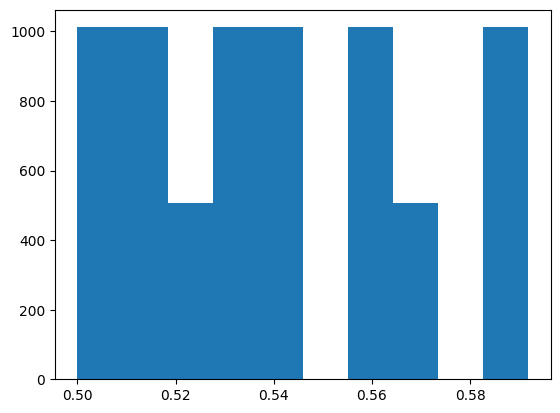

In [14]:
plt.hist(resp_datas.balance_ratio)

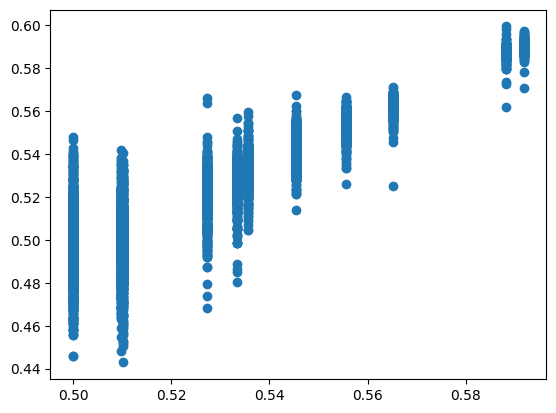

In [13]:
plt.plot( resp_datas.balance_ratio , resp_datas.shuffled_average_score_acc, 'o')

(array([  38.,  235., 4094., 1660.,  619.,  252.,  106.,   43.,   24.,
          13.]),
 array([-0.34696235, -0.22830794, -0.10965353,  0.00900088,  0.12765529,
         0.2463097 ,  0.3649641 ,  0.48361851,  0.60227292,  0.72092733,
         0.83958174]),
 <BarContainer object of 10 artists>)

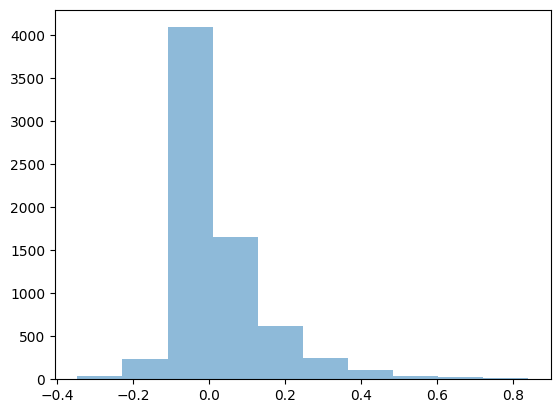

In [11]:
plt.hist(resp_datas.corrected_score_acc, alpha = 0.5)

(array([  20.,  151.,  646., 3461., 2280.,  317.,  124.,   45.,   26.,
          14.]),
 array([0.31636364, 0.37727273, 0.43818182, 0.49909091, 0.56      ,
        0.62090909, 0.68181818, 0.74272727, 0.80363636, 0.86454545,
        0.92545455]),
 <BarContainer object of 10 artists>)

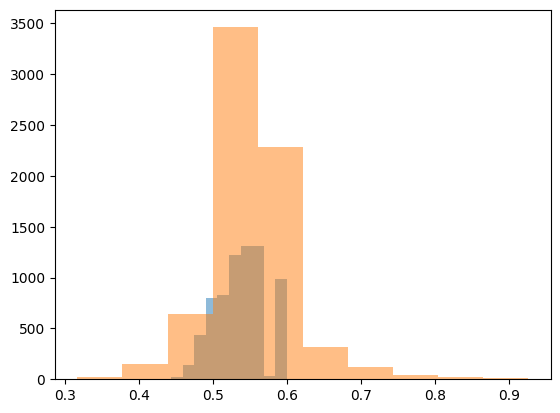

In [10]:
import matplotlib.pyplot as plt
plt.hist(resp_datas.shuffled_average_score_acc, alpha = 0.5)
plt.hist(resp_datas.average_score_acc, alpha = 0.5)

In [4]:
for _, session in sessions.iterrows():
    try :
        new_pipelines.video_treatment.tdms_export.generate(session, extra = "pupil")
        new_pipelines.video_treatment.tdms_export.generate(session, extra = "whiskers")
    except Exception as e :
        print(f"A problem occured for session : {session.alias}")

NameError: name 'sessions' is not defined

In [5]:
new_pipelines.video_treatment.tdms_export.generate(session, extra = "pupil")
new_pipelines.video_treatment.tdms_export.generate(session, extra = "whiskers")

INFO     : gen.video_treatment.tdms_export   : Could not find or load video_treatment.tdms_export.pupil saved file. - 2023-12-15 14:59:57
INFO     : gen.video_treatment.tdms_export   : Performing the computation to generate video_treatment.tdms_export.pupil. Hold tight. - 2023-12-15 14:59:57
INFO     : video_export                      : 1 videos out of 300 will be compressed - 2023-12-15 14:59:57
ERROR    : video_export                      : Error while reading \\cajal\cajal_data2\ONE\Adaptation\wm30\2023-09-19\001\behaviour_imaging\pupil\behaviour.video.pupil.00299.tdms and writing to \\cajal\cajal_data2\ONE\Adaptation\wm30\2023-09-19\001\behaviour_imaging\pupil\behaviour.video_compressed.pupil.00299.avi. - 2023-12-15 14:59:57
ERROR    : video_export                      : Full traceback below :
Traceback (most recent call last):
  File "c:\users\tjostmou\documents\python\__packages__\researchprojects\ResearchProjects\adaptation\new_pipelines_blocks.py", line 1454, in tdms_export
  

c:\users\tjostmou\documents\python\__packages__\pimage\pImage\writers.py:183: UserWarning: No data has been given, video was not created
  warnings.warn("No data has been given, video was not created")


INFO     : video_export                      : 1 videos out of 300 will be compressed - 2023-12-15 14:59:58
ERROR    : video_export                      : Error while reading \\cajal\cajal_data2\ONE\Adaptation\wm30\2023-09-19\001\behaviour_imaging\whiskers\behaviour.video.whiskers.00299.tdms and writing to \\cajal\cajal_data2\ONE\Adaptation\wm30\2023-09-19\001\behaviour_imaging\whiskers\behaviour.video_compressed.whiskers.00299.avi. - 2023-12-15 14:59:58
ERROR    : video_export                      : Full traceback below :
Traceback (most recent call last):
  File "c:\users\tjostmou\documents\python\__packages__\researchprojects\ResearchProjects\adaptation\new_pipelines_blocks.py", line 1454, in tdms_export
    for frame in reader.data_as_frames():
                 ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\users\tjostmou\documents\python\__packages__\inflow\Inflow\tdms\content.py", line 52, in data_as_frames
    framenb = tdms_properties["Pre_Trigger_Frames"] + tdms_properties["Post_Trigger_F

c:\users\tjostmou\documents\python\__packages__\pimage\pImage\writers.py:183: UserWarning: No data has been given, video was not created
  warnings.warn("No data has been given, video was not created")
